In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('data-resource_2016_10_24_bangladesh-population-growth-ratio.csv')

**Basic Information**

In [3]:
print(df.head())

   Year  Population      Male    Female
0  1971    65733076  34058589  31674487
1  1972    66997968  34713973  32283995
2  1973    68118479  35294549  32823930
3  1974    69248216  35879905  33368311
4  1975    70542557  36550548  33992009


In [4]:
print(df.tail())

    Year  Population      Male    Female
41  2012   154331500  79964508  74366992
42  2013   156207391  80936472  75270919
43  2014   158117454  81926142  76191312
44  2015   160036578  82920507  77116071
45  2016   161957017  83915553  78041464


In [36]:
len(df.columns)

6

In [39]:
len(df)

46

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        46 non-null     int64
 1   Population  46 non-null     int64
 2   Male        46 non-null     int64
 3   Female      46 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB
None


In [6]:
print(df.describe())

              Year    Population          Male        Female
count    46.000000  4.600000e+01  4.600000e+01  4.600000e+01
mean   1993.500000  1.131644e+08  5.863439e+07  5.452998e+07
std      13.422618  3.088083e+07  1.600043e+07  1.488040e+07
min    1971.000000  6.573308e+07  3.405859e+07  3.167449e+07
25%    1982.250000  8.530661e+07  4.420032e+07  4.110629e+07
50%    1993.500000  1.134465e+08  5.878055e+07  5.466592e+07
75%    2004.750000  1.413457e+08  7.323609e+07  6.810957e+07
max    2016.000000  1.619570e+08  8.391555e+07  7.804146e+07


**Data Cleaning and Preprocessing**

Checking for missing values

In [7]:
print(df.isnull().sum())

Year          0
Population    0
Male          0
Female        0
dtype: int64


Here, there's no missing values. But if any, then,

In [9]:
df.fillna(method= 'ffill', inplace=True)

<ipython-input-9-543a9ae196df>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method= 'ffill', inplace=True)


Here, all data types are integer(from above). But if there were some another datatype(assuming), they might need to be converted. Then,

In [11]:
df['Year'] = df['Year'].astype(int)

**Analysis and Visualization**

Population Growth Trend

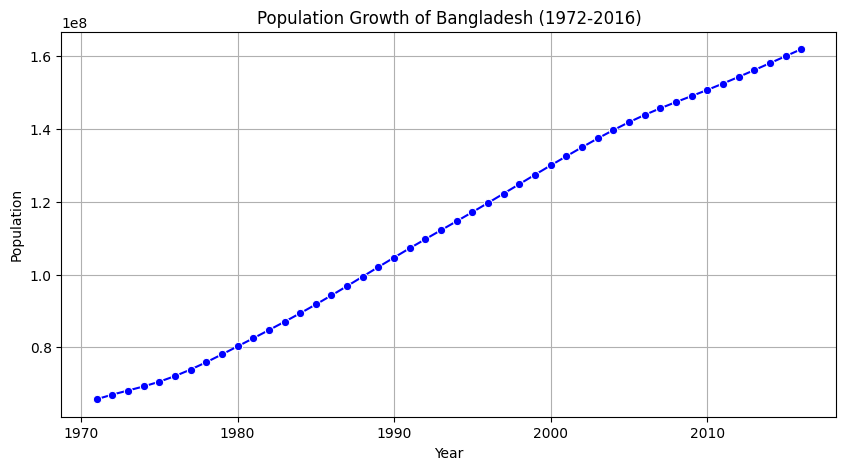

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Population', data=df, marker='o', color='blue')
plt.title("Population Growth of Bangladesh (1972-2016)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.show()

Male vs Female Population

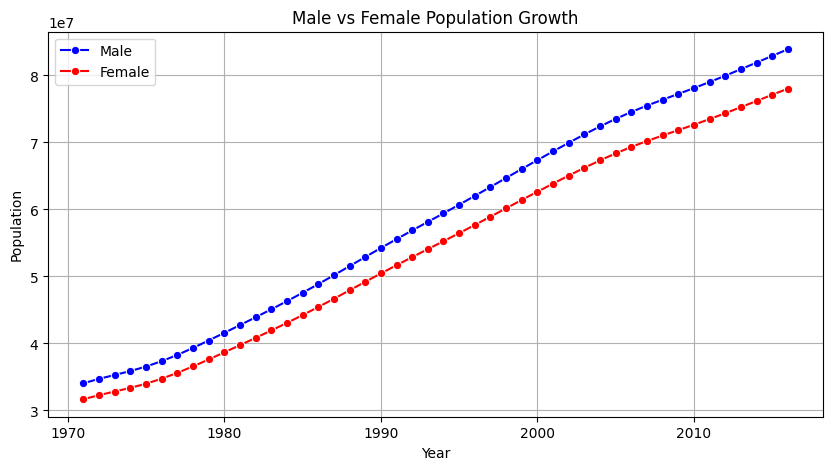

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Male', data=df, marker='o', label='Male', color='blue')
sns.lineplot(x='Year', y='Female', data=df, marker='o', label='Female', color='red')
plt.title("Male vs Female Population Growth")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.show()

Scatter Plot of Male-Female

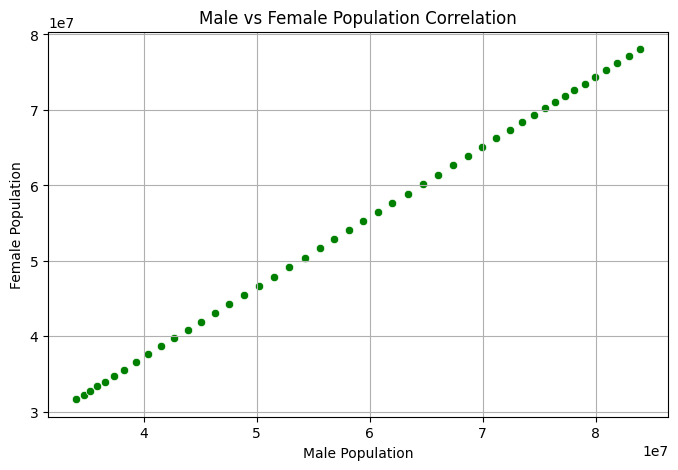

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Male', y='Female', data=df, color='green')
plt.title("Male vs Female Population Correlation")
plt.xlabel("Male Population")
plt.ylabel("Female Population")
plt.grid()
plt.show()


Pairplot for Relationship Analysis

<Figure size 1200x800 with 0 Axes>

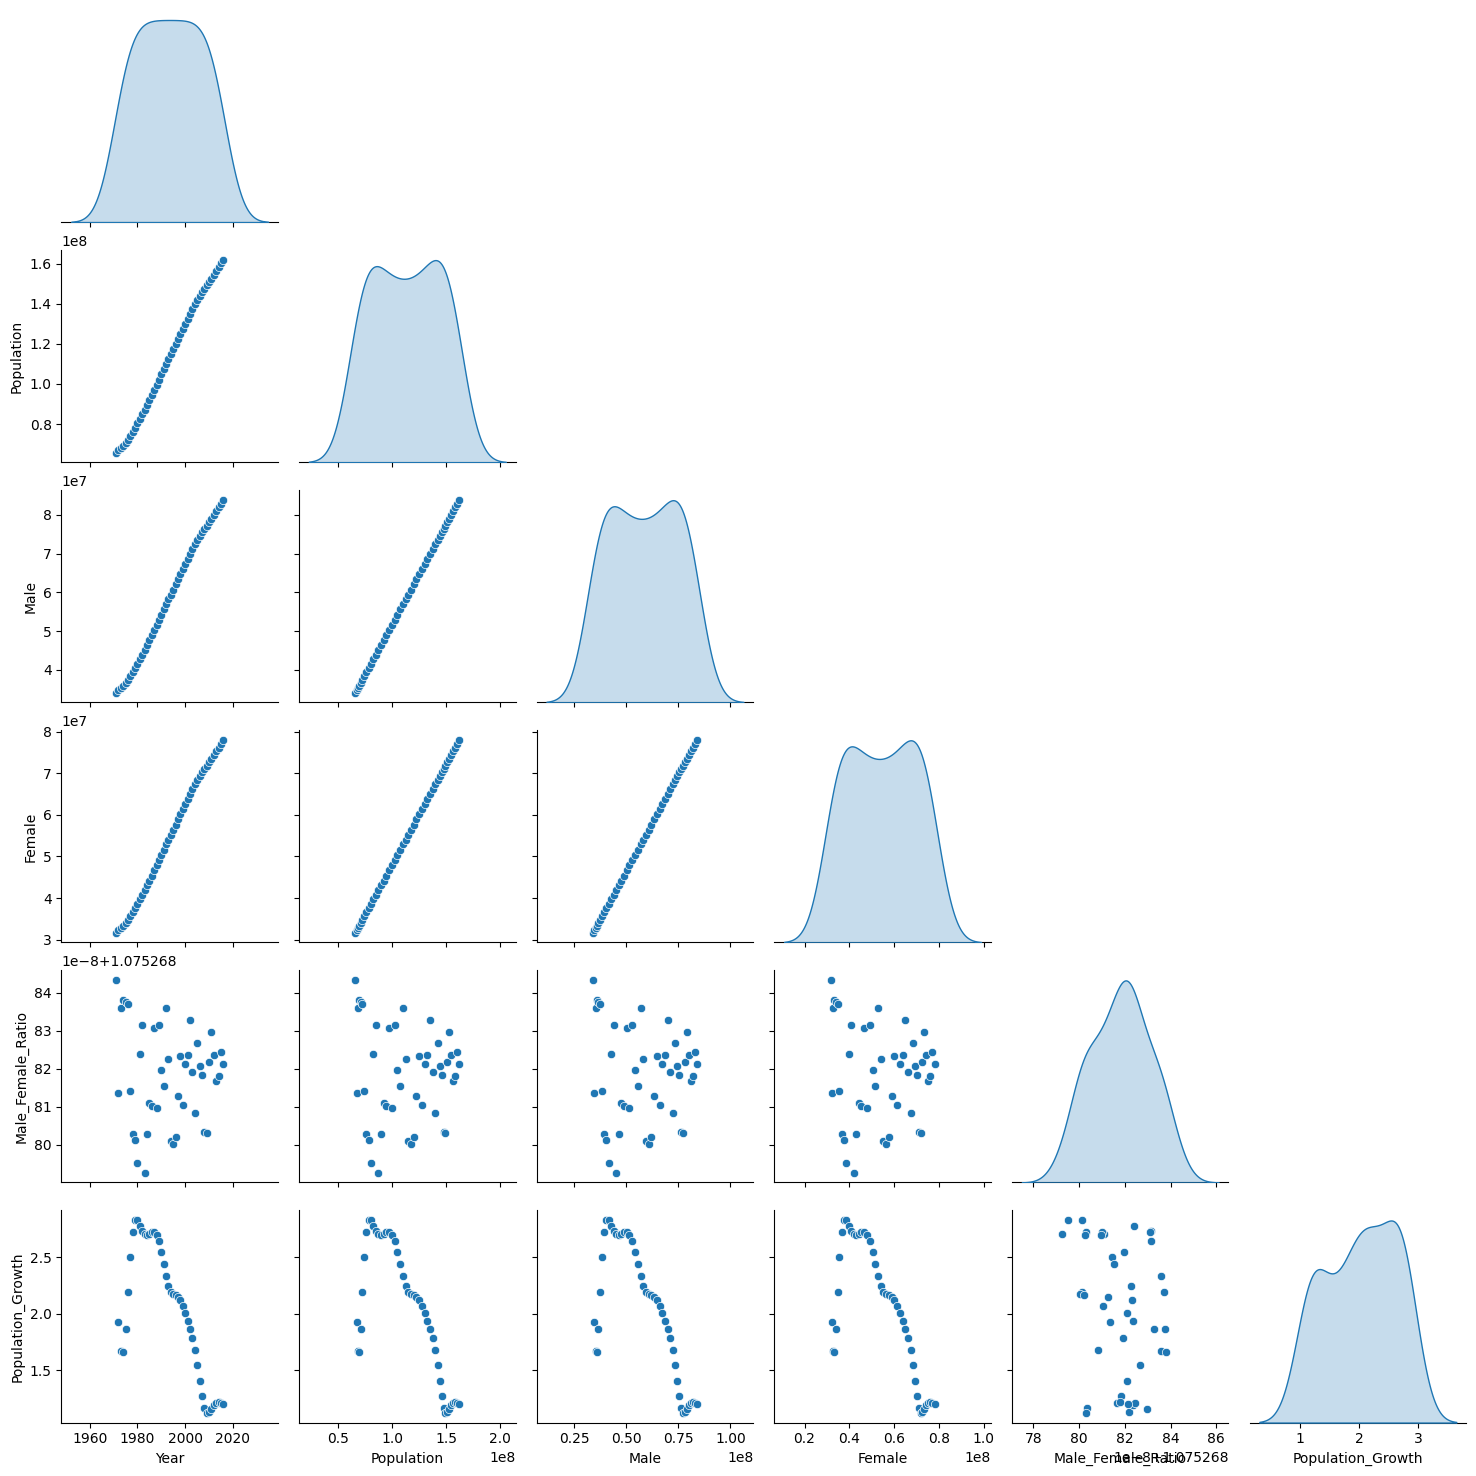

In [40]:
# rltnshp btw variables
plt.figure(figsize=(12, 8))
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()


Male-Female Ratio Analysis

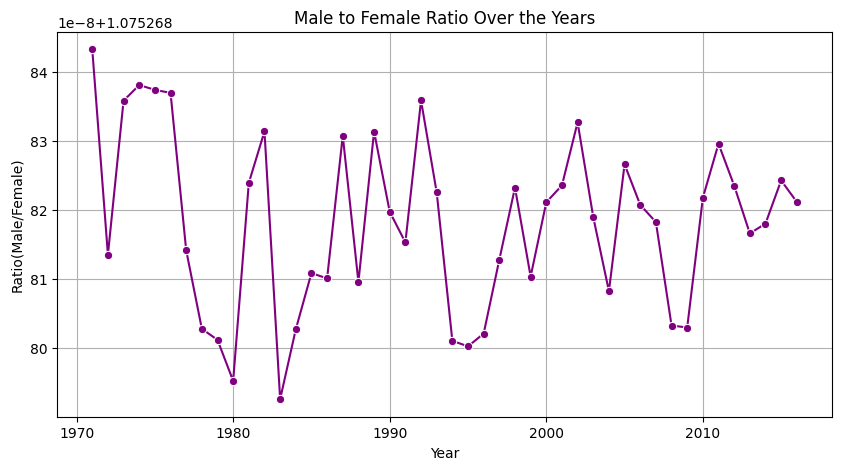

In [19]:
df['Male_Female Ratio'] = df['Male']/['Female']

plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Male_Female_Ratio', data=df, marker='o', color='purple')
plt.title("Male to Female Ratio Over the Years")
plt.xlabel("Year")
plt.ylabel("Ratio(Male/Female)")
plt.grid()
plt.show()

Yearly Population Growth Rate

<ipython-input-20-0a1cde437c30>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Population_Growth', data=df, palette='coolwarm')


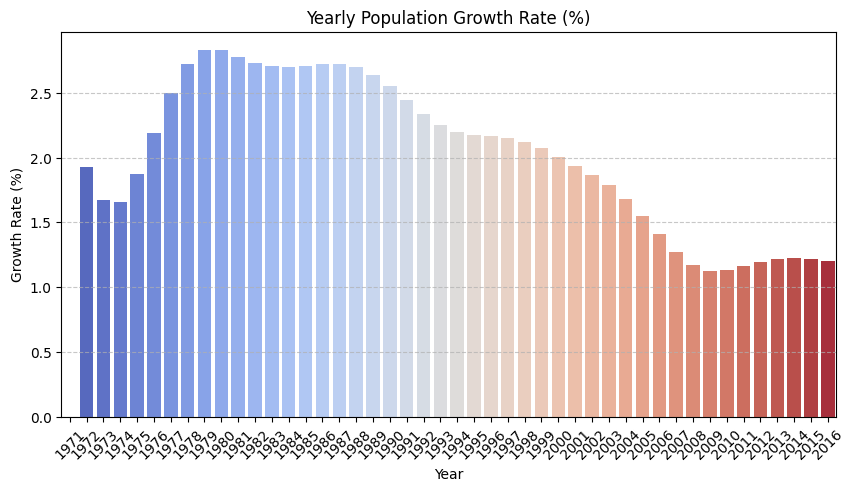

In [20]:
df['Population_Growth'] = df['Population'].pct_change() * 100  #percentage change

plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='Population_Growth', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Yearly Population Growth Rate (%)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Histogram of Population Distribution

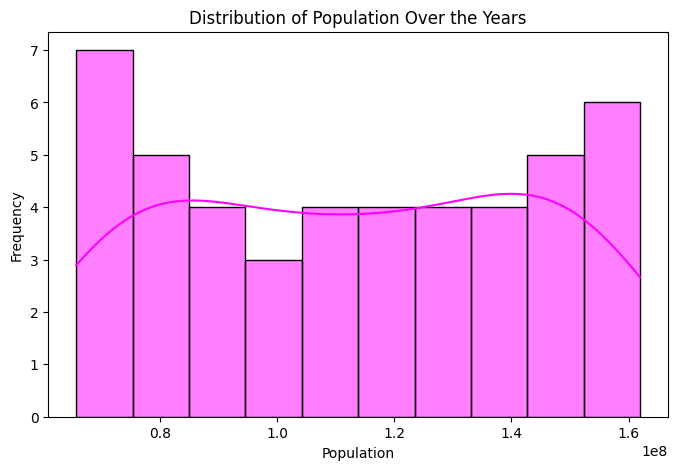

In [35]:
#frequency of population counts
plt.figure(figsize=(8, 5))
sns.histplot(df['Population'], bins=10, kde=True, color='magenta')
plt.title("Distribution of Population Over the Years")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

Heatmap of Correlation

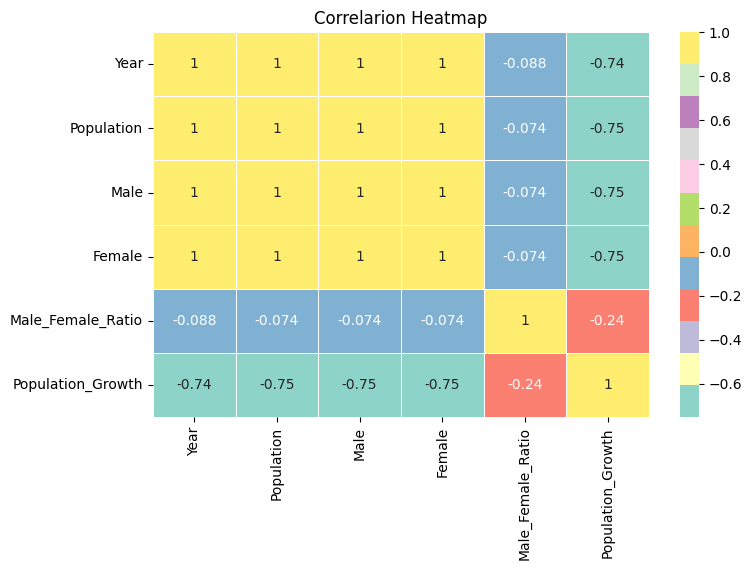

In [33]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='Set3', linewidths=0.5)
plt.title("Correlarion Heatmap")
plt.show()

Boxplot of Populatio Data

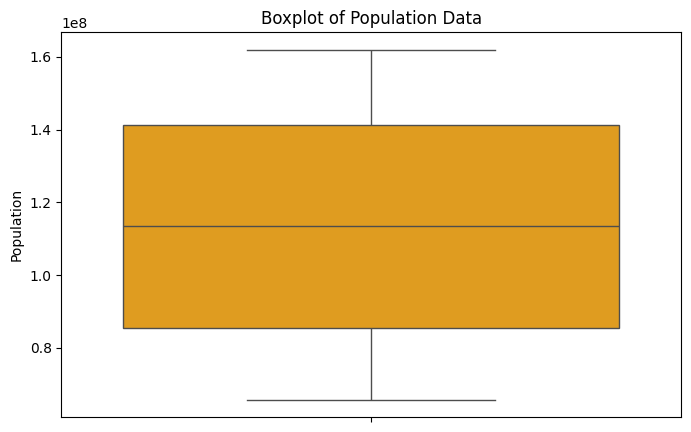

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Population'], color='orange')
plt.title("Boxplot of Population Data")
plt.ylabel("Population")
plt.show()